# Лабораторная работа 8. Обработка естественого языка. Начало

## Датасет

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [361]:
data = pd.read_csv('../datasets/raw/spam.csv', encoding='latin')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [363]:
data.groupby('v1').count()

,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
v1,,,,
ham,4825,45,10,6
spam,747,5,2,0


In [3]:
[i for i in data['v2']]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had y

## Bag of Words

In [5]:
class BoW:
    def __init__(self):
        self.vocabulary = dict()
        self.docs = None
        self.dence_matrix = None
        
    def fit(self, docs):
        self.docs = [doc.lower().split() for doc in docs]
        words = []
        for doc in self.docs:
            for word in doc:
                if word not in words:
                    words.append(word)
                    
        words = list(sorted(words))
        
        for i in range(len(words)):
            self.vocabulary[words[i]] = i
        
        self.dence_matrix = np.matrix([[1 if word in doc else 0 for word in self.vocabulary] for doc in self.docs])
        

In [9]:
texts = ["Великолепный сериал, который поможет успокоить нервы при любых стрессах и просто скрасит серые будни",
         "Пожалуй, если бы я посмотрел только первые пару сезонов этого сериала, я бы с легкой руки написал ему положительную рецензию",
         "В общем, если создатели этого сериала не вернут всё на круги своя, то рейтинги следующих сезонов будут становится все ниже и ниже, а зрительская аудитория будет все меньше и меньше."]

bow = BoW()
bow.fit(texts)

bow.vocabulary

{'а': 0,
 'аудитория': 1,
 'будет': 2,
 'будни': 3,
 'будут': 4,
 'бы': 5,
 'в': 6,
 'великолепный': 7,
 'вернут': 8,
 'все': 9,
 'всё': 10,
 'ему': 11,
 'если': 12,
 'зрительская': 13,
 'и': 14,
 'который': 15,
 'круги': 16,
 'легкой': 17,
 'любых': 18,
 'меньше': 19,
 'меньше.': 20,
 'на': 21,
 'написал': 22,
 'не': 23,
 'нервы': 24,
 'ниже': 25,
 'ниже,': 26,
 'общем,': 27,
 'пару': 28,
 'первые': 29,
 'пожалуй,': 30,
 'положительную': 31,
 'поможет': 32,
 'посмотрел': 33,
 'при': 34,
 'просто': 35,
 'рейтинги': 36,
 'рецензию': 37,
 'руки': 38,
 'с': 39,
 'своя,': 40,
 'сезонов': 41,
 'сериал,': 42,
 'сериала': 43,
 'сериала,': 44,
 'серые': 45,
 'скрасит': 46,
 'следующих': 47,
 'создатели': 48,
 'становится': 49,
 'стрессах': 50,
 'то': 51,
 'только': 52,
 'успокоить': 53,
 'этого': 54,
 'я': 55}

In [10]:
bow.dence_matrix

matrix([[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
        [1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
         1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
         0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0]])

## Tfidf

In [171]:
class Tfidf:
    def __init__(self):
        self.vocabulary = dict()
        self.docs = None
        self.dence_matrix = None
        
    def fit(self, docs):
        self.docs = [doc.lower().split() for doc in docs]
        words = []
        for doc in self.docs:
            for word in doc:
                if word not in words:
                    words.append(word)
                    
        words = list(sorted(words))
        
        for i in range(len(words)):
            self.vocabulary[words[i]] = i
        
        self.dence_matrix = np.matrix([[1 if word in doc else 0 for word in self.vocabulary] for doc in self.docs])
        t_matrix = self.dence_matrix
        self.dence_matrix = self.dence_matrix.copy().astype(float)
        for doc_index in range(len(self.docs)):
            for word_index in range(len(self.vocabulary)):
                self.dence_matrix[doc_index, word_index] *= np.log( (len(self.docs) + 1) / (t_matrix.sum(axis=0)[0,word_index] + 1) ) + 1

In [172]:
texts = ["Великолепный сериал, который поможет успокоить нервы при любых стрессах и просто скрасит серые будни",
         "Пожалуй, если бы я посмотрел только первые пару сезонов этого сериала, я бы с легкой руки написал ему положительную рецензию",
         "В общем, если создатели этого сериала не вернут всё на круги своя, то рейтинги следующих сезонов будут становится все ниже и ниже, а зрительская аудитория будет все меньше и меньше."]

tfidf = Tfidf()
tfidf.fit(texts)

tfidf.dence_matrix

matrix([[0.        , 0.        , 0.        , 1.69314718, 0.        ,
         0.        , 0.        , 1.69314718, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 1.28768207,
         1.69314718, 0.        , 0.        , 1.69314718, 0.        ,
         0.        , 0.        , 0.        , 0.        , 1.69314718,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 1.69314718, 0.        , 1.69314718,
         1.69314718, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 1.69314718, 0.        , 0.        ,
         1.69314718, 1.69314718, 0.        , 0.        , 0.        ,
         1.69314718, 0.        , 0.        , 1.69314718, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         1.69314718, 0.        , 0.        , 0.        , 0.        ,
         0.        , 1.69314718, 1.28768207, 0.        , 0.        ,
         0. 

In [180]:
class My_KMeans():
    def __init__(self, n_clusters=3, max_iters=1000):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.labels = None
        self.iters = 0
        self.inertia = None
        
    def fit(self, data):
        data_bounds = np.squeeze(np.sort(np.array([np.amax(data[0], axis=0), np.amin(data[0], axis=0)]).T))
        self.centroids = []
        self.labels = np.zeros(data[0].shape[0])
        
        for i in range(self.n_clusters):
            self.centroids.append([(data_bounds[i][1] - data_bounds[i][0]) * np.random.random_sample() + data_bounds[i][0] for i in range(data[0].shape[1])])
        
        self.centroids = np.array(self.centroids)
        change = np.inf
        
        while (self.iters < self.max_iters and change > 0.5):
            prev_centroids = self.centroids.copy()
            dists = []
            min_dists = []
            
            for point in data[0]:
                dists_centroids = []
                for centroid in self.centroids:
                    dists_centroids.append(np.linalg.norm(point - centroid))
                dists.append(dists_centroids)
                
            for i in range(len(dists)):
                self.labels[i] = np.argmin(dists[i])
                min_dists.append(dists[i][np.argmin(dists[i])])
            self.inertia = np.sum(np.square((min_dists)))
            
            for i in range(self.n_clusters):
                cluster_points = []
                for j in range(len(self.labels)):
                    if self.labels[j] == i:
                        cluster_points.append(data[0][j])
                self.centroids[i] = np.mean(cluster_points, axis=0)
                
            change = np.mean(np.linalg.norm(self.centroids - prev_centroids))
            self.iters +=1

In [245]:
class My_PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.n_eigens = None
        self.X = None
        
    def fit_transform(self, data):
        scaler = StandardScaler()
        data = scaler.fit_transform(np.asarray(data))
        eigen_w, eigen_v = np.linalg.eig(np.cov(data.T.astype(float), bias=True))
        eigens = sorted(zip(eigen_w, eigen_v), key=lambda x: x[0], reverse=True)
        n_eigens = eigens[:self.n_components]
        self.m = np.vstack([n_eigens[i][1] for i in range(self.n_components)])
        return data.dot(self.m.T)

## Кластеризация

In [253]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [254]:
data_train = data['v2'].head(250)
y_train = data['v1']
y_train = y_train.replace('ham', 0)
y_train = y_train.replace('spam', 1)
y_train

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

In [213]:
tfBig = Tfidf()
tfBig.fit(data_train)

len(tfBig.vocabulary)

1658

In [237]:
tfBig.vocabulary

{'!': 0,
 "!!''.": 1,
 '$': 2,
 '$1': 3,
 '$350': 4,
 '&': 5,
 '&amp;': 6,
 '&lt;#&gt;': 7,
 '&lt;decimal&gt;': 8,
 '&lt;url&gt;': 9,
 "''": 10,
 "'melle": 11,
 '(18+)': 12,
 '(32/f)': 13,
 '(flights': 14,
 '(oru': 15,
 '*9': 16,
 '+': 17,
 ',': 18,
 '-': 19,
 '-apples&pairs&all': 20,
 '-msg': 21,
 '-pls': 22,
 '.': 23,
 '..': 24,
 '...': 25,
 '07046744435': 26,
 '07732584351': 27,
 '07742676969': 28,
 '0800': 29,
 '08000930705': 30,
 '08002986030': 31,
 '0808': 32,
 "08452810075over18's": 33,
 '08700621170150p': 34,
 '08712300220': 35,
 '0871277810810': 36,
 '0871277810910p/min': 37,
 '087187262701.50gbp/mtmsg18': 38,
 '08719180248': 39,
 '09058094597': 40,
 '09061209465': 41,
 '09061701461.': 42,
 '09061701939.': 43,
 '09064012160.': 44,
 '09064019788': 45,
 '09066364589': 46,
 '1': 47,
 '100': 48,
 '10am-9pm': 49,
 '10p.': 50,
 '11': 51,
 '12': 52,
 '125gift': 53,
 '12hrs': 54,
 '145': 55,
 '150p/day,': 56,
 '150pm.': 57,
 '150ppm': 58,
 '16+': 59,
 '169': 60,
 '18': 61,
 '18+6*å£1.

In [255]:
my_pca = My_PCA(2)
X_pca = my_pca.fit_transform(tfBig.dence_matrix)
X_pca

array([[ 3.09669211e-02-7.28651156e-02j,  2.53601888e-01+5.33366779e-01j],
       [ 2.51524976e-02-6.72558514e-02j, -4.16176373e-02-2.37205984e-02j],
       [ 3.61544331e-01-7.13782505e-02j,  5.46457176e-01+1.16117532e-01j],
       [-1.06388912e-01+1.36925276e-02j, -2.48879485e-01-4.88271794e-02j],
       [ 4.21489863e-02+1.88519424e-02j, -1.25434378e-02+7.08670363e-02j],
       [ 1.48493535e-01+9.94759621e-02j,  2.66165924e-01-2.81638320e-02j],
       [ 3.18720581e-01+7.28270975e-03j,  8.01581711e-02+1.12431805e-02j],
       [ 2.18899975e-01-7.33020631e-02j, -1.12021035e-01+7.47093006e-02j],
       [ 1.15029465e+00-3.58779321e-02j, -2.56624978e-01+7.25733835e-02j],
       [ 8.95016196e-02+1.34174389e-01j,  5.17436482e-01-1.38891764e-01j],
       [-2.94603304e-01+3.20843941e-02j,  2.05198511e-01-5.75310448e-01j],
       [-1.57022006e-01-2.15044981e-02j, -1.71717337e-02+5.30860189e-02j],
       [ 9.61183617e-01+1.93006338e-02j, -1.39647093e-01-4.17903270e-02j],
       [ 1.78174925e-01-8

C:\Users\Егор\Desktop\programming\ML\lab1\venv\lib\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


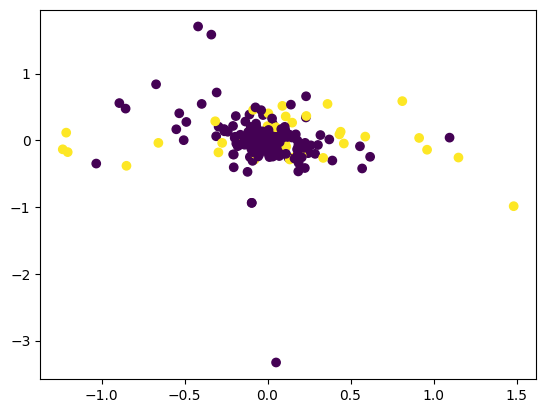

In [256]:
plt.scatter([X_pca[:,0]], [X_pca[:,1]], c=y_train[:250].to_numpy());

In [272]:
km = My_KMeans(n_clusters=2)
km.fit([X_pca,])
print(km.iters)

2


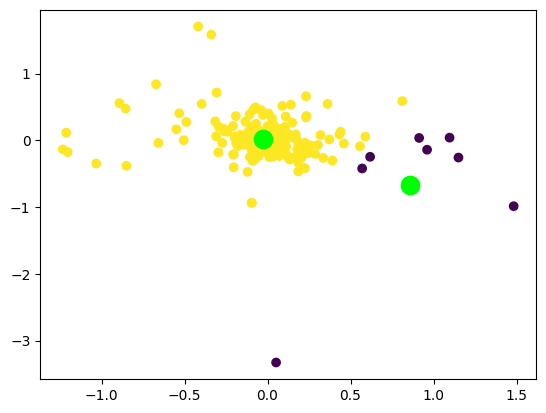

In [273]:
plt.scatter(X_pca[:,0], [:,1], c=km.labels);
plt.scatter(km.centroids[:,0], km.centroids[:,1], s=175, c='lime');

## LDA

In [310]:
from time import time
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import CountVectorizer

In [350]:
data = pd.read_csv('../datasets/raw/spam.csv', encoding='latin')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [351]:
n_samples = 5000
n_features = 1000
n_topics = 10
n_top_words = 25

In [352]:
data = data['v2'][:n_samples]

In [353]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [354]:
data_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
data = data_vectorizer.fit_transform(data)

In [355]:
data.shape

(5000, 1000)

In [356]:
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20, 
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0).fit(data)

In [357]:
data_vectorizer.get_feature_names_out()

array(['00', '000', '02', '03', '0800', '08000839402', '08000930705',
       '10', '100', '1000', '10p', '11', '12', '12hrs', '150', '150p',
       '150ppm', '16', '18', '1st', '20', '200', '2000', '2003', '2004',
       '20p', '250', '25p', '2day', '2lands', '2nd', '2nite', '30', '350',
       '4u', '50', '500', '5000', '50p', '750', '800', '8007', '86688',
       '87066', '87077', '900', 'abiola', 'able', 'abt', 'ac', 'accept',
       'account', 'actually', 'add', 'address', 'admirer', 'aft',
       'afternoon', 'age', 'age16', 'ago', 'ah', 'aight', 'al', 'alright',
       'amp', 'angry', 'ans', 'answer', 'anymore', 'anytime', 'apartment',
       'apply', 'ar', 'ard', 'area', 'asap', 'ask', 'askd', 'asked',
       'asking', 'ass', 'attempt', 'auction', 'available', 'ave', 'await',
       'awaiting', 'award', 'awarded', 'away', 'awesome', 'b4', 'babe',
       'baby', 'bad', 'bak', 'balance', 'bank', 'bath', 'bathe', 'bb',
       'bcoz', 'beautiful', 'bed', 'bedroom', 'believe', 'best'

In [358]:
lda.components_.shape

(10, 1000)

In [359]:
lda.transform(data).shape

(5000, 10)

In [360]:
print_top_words(lda, data_vectorizer.get_feature_names_out(), 20)

Topic #0:
got just home want yes lol buy talk really gonna ya time wat tonight told don getting didn stuff eat
Topic #1:
know da amp let care ve said money called check actually room contact looking says didnt make 2nd reach attempt
Topic #2:
won prize cash claim www urgent txt nokia week hey guaranteed win com draw 500 customer word 1000 holiday 100
Topic #3:
send pls day happy oh today doing love number wish thanks message thought ur sent birthday good don bed think
Topic #4:
going did went work class lunch pa wife dinner came selected online receive early food lei code account said nt
Topic #5:
lt gt come like right pick tomorrow phone place night waiting house half want time read drive pay minutes write
Topic #6:
good love dear say life morning ask babe sleep feel day dun gud thing nice yup smile night heart did
Topic #7:
ok need dont hi great hope new way tell im just good year ur like haha having sure make try
Topic #8:
ll lor sorry later time ì_ think don meet yeah ìï wat leave 